<table width = 400 align="left" style = "font-size:18px;">
<tr>
<td>Name:</td>
<td>Bikis Muhammed</td>
</tr>
<tr>
<td>Email:</td>
<td>bmpb8@mst.edu</td>
</tr>
<tr>
<td>Course:</td>
<td>CS 5402</td>
</tr>
<tr>
<td>Assignment:</td>
<td>What is data mining/What is artificial intelligence</td>
</tr>
<tr>
<td>Course:</td>
<td>CS 5402</td>
</tr>
</table>


<img src="blacklogo.png" alt="logo" style="width: 150px;"/>

In [7]:
# Imported for searching google with python
from googlesearch import search
# Imported for http request
import requests
# For parsing html and xml data/files
from bs4 import BeautifulSoup
# For date and time
from datetime import datetime
# For using csv file
import pandas as pd
# For generating word clouds Image
from wordcloud import WordCloud, STOPWORDS
# For extracting a domain name of a website
import tldextract
# For removing punctuation
import string
# For counting the frequncy of words in a string
from collections import Counter
# For ploting the frequency of common words
import matplotlib.pylab as plt
# For minimal natural language processing
import nltk
# To get extended list of words from wordnet and words
from nltk.corpus import wordnet, words

## Concept/Objctive Description:

Analyze the frequency/infrequency usage of words by different web resources to explain data mining and artificial intelligence.

## Data Collection: 
Data collection is done in an automated fashion with the help of different python packages. Google python package is used to search google and get the first fifteen URLs for both "What is data mining" and "What is artificial intelligence." Each URL is then placed on two lists, and this list of URLs is searched for the text that contains using the technique of web scraping or crawling.  All the extracted text is then placed into two separate string variables for both "What is data mining" and "What is artificial intelligence. 
All data found is placed in a CSV file for further processing. 

## Example Description:
<b>Category</b>  
This is just the query value. It will have either "What is data mining" or "What is artificial intelligence."

<b>PullDate</b>  
This the date when the data is web-scrapped. 

<b>Source</b>  
This is the general name instance of each website. It is not the title of an article on a website. For instance, if https://www.wikipedia.org is visited, Wikipedia would be extracted as the name of the site.

<b>Link</b>  
This example contains all URLs that have been used for web scraping.

<b>Text</b>  
This contains all the generated and compiled and appended text data.

## Web Searching and Scraping: 

Web Scraping

In [9]:
# URL get request
# beautifulsoup html parsing
# finding all paragraph tags
# get the text undder that tag
def webScrap (URL):
    text = ''
    result = requests.get(URL)
    soup = BeautifulSoup(result.content, features="html.parser")
    paragraphs = soup.findAll('p')
    for par in paragraphs:
        text += par.getText()
    return text

Google Searching and Minimal Language processing

Validating includes elemntaing websites from being using more than one time in the search results.

In [10]:
# Google search
    # Quiry:  the query text which is being searched
    # tld:  the domain .com, .org
    # lang: languge
    # num:  number of requests per page
    # stop determine the number of urls that will be generated
# Append the result to a list

# Google will provide 45 search result and 15 will valid websites will be selected for scrapping
# webscarapped text will be cleaned
def getWebData ( query):
    URLs = []
    HOSTNAME = []
    TEXT = []
    limit = 15
    counter = 0
    for i in search (query,  tld='co.in', lang='en', tbs='0', safe='off', num=3, start=0, stop= 50, pause=2.0, country='', extra_params=None, user_agent=None, verify_ssl=True):
        subdomain, domain, suffix = tldextract.extract(i)
        text = str(webScrap (i))

        # Removing newline char
        text =  text.replace('\n', '')

        # Remove unnecessary holder
        text =  text.replace('\\x', '')

        # Removing punctuation from strings
        for punk in string.punctuation:
            text = text.replace(punk,'')

        # Removing number from strings
        number = '0123456789'
        for num in number:
            text =  text.replace(num, '')
       #--------------------------------------------------------------------------     
        #THis taks for ever
        # Remove any number left between strings
#         text = ''.join ([i for i in text if not i.isdigit()])
        
        # Removing non English words from text (simple natural language processing)
        # It uses both words and wordnet from nltk library, and the custom string contains 384042 words
#         customWord = (' '.join(word for word in wordnet.words()).split()) + words.words()
#         text = ' '.join([word for word in nltk.wordpunct_tokenize(text) if word.lower() in customWord or not word.isalpha() ])

        #----------------------------------------------------------------------


        # Check if the domain is not empty and the hostname is already selected (which is a part of normalization process)
        if domain != '' and domain not in HOSTNAME and text and ("Data mining is" in text or "Artificial intelligence is" in text or 'AI' in text or "Artificial intelligence" in text or "Artificial Intelligence" in text):
            if counter < limit:
                HOSTNAME.append(domain)
                URLs.append(i)
                TEXT.append(text)
                counter += 1
            else:
                return  HOSTNAME, URLs, TEXT

    # return Hostname, URLs

Word Cloud

Wordcloud and collection python libraries will be used for text abalytics perposes. 

In [11]:
# makeWordCloud method has text and image name parameters.
# STOPWORD library is also used to remove unnecessary words
def makeWordCloud (text, imagename, sw):
    # Generating the word cloud file
    mywordcloud=  WordCloud (
    background_color= 'white',
    stopwords= STOPWORDS.update(sw),
    height= 800,
    width=600,
    collocations= False,
    )
    mywordcloud.generate(text)
    mywordcloud.to_file(imagename)

## Exploratory Data Analysis:
Not applicable.

## Mining or Analytics:

In [12]:
# Adding a question mark at the end of a search may help searching
query = ['What is data mining', 'What is artificial intelligence']
# Ask google to find websites that has this exact match
query1 = ['"Data mining is"', '"Artificial intelligence is"']

### Table Data
What is data mining

In [13]:
category = [query[0]]*15
pullDate = pulldate = [datetime.today().strftime('%m/%d/%Y')]*15
source, link, text1 = getWebData(query1[0])

In [14]:
pd.DataFrame({'Category':category, 'PullDate': pulldate, 'Source':source, 'Link': link, 'Text':text1}).to_csv('result1.csv', mode  = 'w', index=False)
df = pd.read_csv("result1.csv")
df

,Category,PullDate,Source,Link,Text
0,What is data mining,06/16/2021,wikipedia,https://en.wikipedia.org/wiki/Data_mining,Data mining is a process of extracting and dis...
1,What is data mining,06/16/2021,sas,https://www.sas.com/en_us/insights/analytics/d...,Skip to main contentAmericasEuropeMiddle East ...
2,What is data mining,06/16/2021,talend,https://www.talend.com/resources/what-is-data-...,Data mining isn’t a new invention that came wi...
3,What is data mining,06/16/2021,investopedia,https://www.investopedia.com/terms/d/dataminin...,Data mining is a process used by companies to ...
4,What is data mining,06/16/2021,indiatimes,https://economictimes.indiatimes.com/definitio...,How they can help in wealth creationTomorrow i...
5,What is data mining,06/16/2021,britannica,https://www.britannica.com/technology/data-mining,Our editors will review what you’ve submitted ...
6,What is data mining,06/16/2021,tableau,https://www.tableau.com/learn/articles/what-is...,Data mining is the process of understanding da...
7,What is data mining,06/16/2021,techtarget,https://searchsqlserver.techtarget.com/definit...,Data mining is the process of sorting through ...
8,What is data mining,06/16/2021,sisense,https://www.sisense.com/glossary/data-mining-b...,Explore DashboardBy submitting this form I agr...
9,What is data mining,06/16/2021,utexas,https://www.laits.utexas.edu/~norman/BUS.FOR/c...,by Doug Alexanderdeatracorcom Data mining is a...


In [15]:
# Wordcloud
# Manual cleaning of the data 
stopwords = {'need', 'part', 'allows', 'create', 'wheather', 'benefits', 'determine', 'using', 'past', 'want', 'understand', 'past', 'easy', 'huge', 'include', 'allows', 'easy', 'name',  'long', 'increase', 'answer', 'nhttp','year', 'project', 'within', 'one', 'nIn', 'html', 'allow', 'question', 'find', 'cost', 'suport', 'available', 'first', 'goal', 'field', 'area'}
clean_list =[]
STOPWORDS.update(stopwords)
bigword = ''.join(text1)

# # Removing newline char
# bigword =  bigword.replace('\n', '')

# # Remove unnecessary holder
# bigword =  bigword.replace('\\x', '')

# # Removing punctuation from strings
# for punk in string.punctuation:
#     bigword = bigword.replace(punk,'')

# # Removing number from strings
# number = '0123456789'
# for num in number:
#     bigword =  bigword.replace(num, '')


clean_text1 =''
for word in bigword.split():
    if str(word).lower() not in list(STOPWORDS):
        clean_text1 += ' '+  word

makeWordCloud(str(clean_text1), 'result1.png', STOPWORDS)


<img src="result1.png" alt="wordcloud 1" style="width: 100%; height: 100%"/>

What is artificial intelligence

In [16]:
category = [query[1]]*15
pullDate = pulldate = [datetime.today().strftime('%m/%d/%Y')]*15
source, link, text2 = getWebData(query1[1])

In [17]:
pd.DataFrame({'Category':category, 'PullDate': pulldate, 'Source':source, 'Link': link, 'Text':text2}).to_csv('result2.csv', mode  = 'w', index=False)
df = pd.read_csv("result2.csv")
df

,Category,PullDate,Source,Link,Text
0,What is artificial intelligence,06/16/2021,investopedia,https://www.investopedia.com/terms/a/artificia...,Gordon Scott has been an active investor and t...
1,What is artificial intelligence,06/16/2021,wikipedia,https://en.wikipedia.org/wiki/Artificial_intel...,Artificial intelligence AI is intelligence dem...
2,What is artificial intelligence,06/16/2021,builtin,https://builtin.com/artificial-intelligence,Subscribe to Built In to get tech articles jo...
3,What is artificial intelligence,06/16/2021,brookings,https://www.brookings.edu/research/what-is-art...,Guidance for the Brookings community and the p...
4,What is artificial intelligence,06/16/2021,ibm,https://www.ibm.com/cloud/learn/what-is-artifi...,While a number of definitions of artificial in...
5,What is artificial intelligence,06/16/2021,sas,https://www.sas.com/en_us/insights/analytics/w...,Skip to main contentAmericasEuropeMiddle East ...
6,What is artificial intelligence,06/16/2021,techtarget,https://searchenterpriseai.techtarget.com/defi...,Artificial intelligence AI is the simulation o...
7,What is artificial intelligence,06/16/2021,futureoflife,https://futureoflife.org/background/benefits-r...,“Everything we love about civilization is a pr...
8,What is artificial intelligence,06/16/2021,zdnet,https://www.zdnet.com/article/what-is-ai-every...,An executive guide to artificial intelligence ...
9,What is artificial intelligence,06/16/2021,stanford,http://jmc.stanford.edu/artificial-intelligenc...,Q What is artificial intelligenceA It is the s...


In [18]:
# Wordcloud
# Manual cleaning of the data 
stopwords = {'may', 'issue', 'called', 'may', 'best', 'now', 'well', 'every', 'major', 'high', 'complex', 'agent', 'form', 'read', 'really', 'enable', 'think', 'much'}
clean_list =[]
STOPWORDS.update(stopwords)
bigword = ''.join(text2)

clean_text2 =''
for word in bigword.split():
    if str(word).lower() not in list(STOPWORDS):
        clean_text2 += ' '+  word

makeWordCloud(str(clean_text2), 'result2.png', STOPWORDS)


<img src="result2.png" alt="Word Cloud 2" style="width: 100%; height: 100%"/>

## Evaluation:


 #### Frequency Analysis of words

#### What is data mining  and artificail intelligence(The most frequent 100 words)

In [27]:
DM = {}
AI = {}
# Frequency of the most common 100 words
for word, count in Counter(clean_text1.lower().split()).most_common(100):
    DM[word] =  count
    
for word, count in Counter(clean_text2.lower().split()).most_common(100):   #give a number value for most commpn argument
    AI[word] =  count
# for letter, count in countedWords.most_common(30):
#     wordCount[letter.lower()] = count
    
# for i,j in DM.items():
#         print('{0}: {1}'.format(i.upper(),j))
        
print("--------------------------------------------------------")
print('| {:<14} | {: <4} | {: <13} | {: <5} |'.format("Nominal Data", "FreqInDM", "Nominal Data", "FreqInAI" ))
print("--------------------------------------------------------")
for x, y in zip(DM.keys(), AI.keys()):
    print('| {: <14} | {: <8} | {: <13} | {: <8} |'.format(str(x), DM[str(x)],str(y), AI[str(y)]))
print("--------------------------------------------------------")

--------------------------------------------------------
| Nominal Data   | FreqInDM | Nominal Data  | FreqInAI |
--------------------------------------------------------
| data           | 3889     | ai            | 1799     |
| mining         | 2613     | people        | 653      |
| helps          | 707      | programs      | 593      |
| information    | 450      | problems      | 577      |
| customer       | 412      | intelligence  | 561      |
| techniques     | 407      | human         | 526      |
| used           | 352      | chess         | 514      |
| business       | 350      | machine       | 472      |
| process        | 329      | problem       | 466      |
| customers      | 328      | computers     | 451      |
| companies      | 290      | computer      | 439      |
| predict        | 285      | will          | 410      |
| example        | 274      | program       | 365      |
| analysis       | 266      | humans        | 361      |
| new            | 255      | d

#### Common words

In [26]:
AIC = {}
MDC = {}
for commonkey in set(DM).intersection(set(AI)):
    AIC[commonkey] = AI [commonkey]
    MDC[commonkey] = DM[commonkey]
    print (commonkey)

data
many
learn
understanding
use
used
new
example
work
systems


#### Frequency Graph

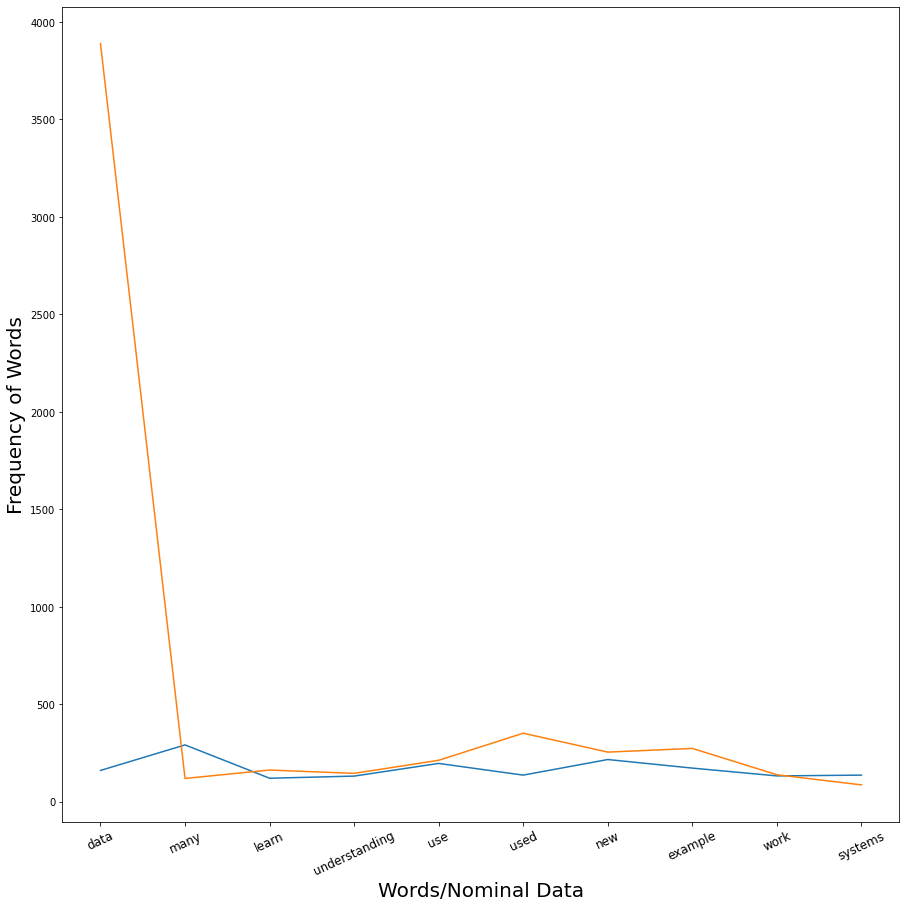

In [28]:
x = list(AIC.keys())
y = list(AIC.values())

k = list(MDC.keys())
l = list(MDC.values())

plt.plot(x, y)
plt.plot(k,l)

# plt.bar(range(len(DM)), DM.values(), align='center', width=0.5)
plt.xlabel('Words/Nominal Data', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.xticks(ticks = x, rotation=25, labels = x, fontsize =12)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()
# fig = plt.figure()
# fig.savefig('plot.png')

## Results:

After selecting the most frequented 100 words from both data mining and artificial intelligence, the only common words found were 12 in count. As we can see from the graph, the word data is used more frequently than other words, especially in Data mining. 

## References

GeeksforGeeks (2021). Python Libraries. Retrived (2021, Jun 14) from https://www.geeksforgeeks.org/

JUpyter (2021). The Jupyter Notebook. Retrived (2021, June 10) from https://jupyter-notebook.readthedocs.io/en/stable/notebook.html

Schafer, Corey (2016). Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough. Retrived (2021, June 10) from https://www.youtube.com/watch?v=HW29067qVWk.

Stackoverflow (2021). Python Libraries. Retrived (2021, Jun 14) from https://stackoverflow.com/.
